# Linear Regression

## Introduction

### Assumptions of Linear Regression

1. Linearity: The relationship between the dependent and independent variables is linear.
2. Homoscedasticity: The variance is the same across all values of the independent variables.
3. Multivariate normality: normality of error distribution for any value of the independent variables.
4. Independence of observations: Observations are independent of each other.
5. Lack of multicollinearity: predictors are not correlated with each other.


### Fancy algebra

There's a simplified version after the Simple Linear Regression section.

Where:
- $y$ is the dependent variable
- $a$ is the y-intercept, the value of $y$ when $x = 0$
- $bx_1$ etc. are the fearues

$$y = a + bx_1 + cx_2 + ... + mx_m$$

If we have multiple data points: for any data point $i$ in the dataset, $y_i$ is the dependent variable, $x_{i,1}$ to $x_{i,m}$ the features, and $a$ is the y-intercept.

We solve for parameters $a$ to $m$:

$$
\begin{bmatrix}
\begin{array}{l|l}
    y_1 & a + b x_{1,1} + c x_{1,2} + \dots + m x_{1,m} \\
    y_2 & a + b x_{2,1} + c x_{2,2} + \dots + m x_{2,m} \\
    \vdots & \vdots \hspace{2em} \vdots \hspace{3em} \vdots \hspace{5.5em} \vdots\\
    y_n & a + b x_{n,1} + c x_{n,2} + \dots + m x_{n,m}
\end{array}
\end{bmatrix}
$$


In matrix form:

$$
\begin{equation*}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}
=
\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
    1 & x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
    \vdots & \vdots & \vdots & \hspace{2em}  & \vdots \\
    1 & x_{n,1} & x_{n,2} & \cdots & x_{n,m}
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
    c \\
    \vdots \\
    m \vphantom{\vdots}  % Aligns "m" vertically with matrix entries
\end{bmatrix}
\end{equation*}
$$

## Simple Linear Regression

Consider fitting a line to points on a Cartesian plane (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$). The line is represented by the equation:

$$y = \beta_0 + \beta_1 x$$

This corresponds to the case where we have a single feature (a single predictor variable,
$x$) in a regression model, where $\epsilon$ denotes error.

$$y = \beta_0 + \beta_1 x + \epsilon$$

In an ideal case where the error term is zero, $\beta_0$ represents the value of the dependent variable $y$ at $x = 0$. Within the range of the independent variable $x$, $\beta_1$ represents the increase in the outcome $y$ corresponding to a unit change in $x$.

In more technical terms: for any given instance $i$, $\epsilon_i$ is a measure of the difference between the true value of $y_i$ and the predicted value of $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = 0$.

In the case of a model with a single predictor $x$, we can use this formula to estimate $\beta_1$:

$$\hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x}$$



### Fancy algebra simplified


|                   | Hours (x) | Volume (y) | $(x-\bar{x})$ | $(y-\bar{y})$ | $(x-\bar{x})(y-\bar{y})$ | $(x-\bar{x})^2$ |
|-------------------|-----------|------------|---------------|---------------|--------------------------|-----------------|
|                   | 34        | 102        | -6            | -32           | 192                      | 36              |
|                   | 35        | 109        | -5            | -25           | 125                      | 25              |
|                   | 39        | 137        | -1            | 3             | -3                       | 1               |
|                   | 42        | 148        | 2             | 14            | 28                       | 4               |
|                   | 43        | 150        | 3             | 16            | 48                       | 9               |
|                   | 47        | 158        | 7             | 24            | 168                      | 49              |
| $\bar{x},\bar{y}$ | **40**    | **134**    |               |               |                          |                 |

Then we can sum the values in the columns to get the following:

- $\sum(x-\bar{x})(y-\bar{y}) = 558$
- $\sum(x-\bar{x})^2 = 124$

And we can calculate $\beta_1$ as follows:

$$\beta_1 = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2} = \frac{558}{124} = 4.5$$

And $\beta_0$ as follows:

$$\beta_0 = \bar{y} - \beta_1\bar{x} = 134 - (4.5 \times 40)  = -46$$

And the y intercept (where $x$ will be the value of the independent variable):

$$\hat{y} = \beta_0 + \beta_1x = -46 + 4.5x$$

For instance, if we want to check how many hours to reach a volume of 125 units:

$$125 = -46 + 4.5x$$

$$x = \frac{171 + 46}{4.5} = 38$$

### Visual representation of fitness for linear regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8')

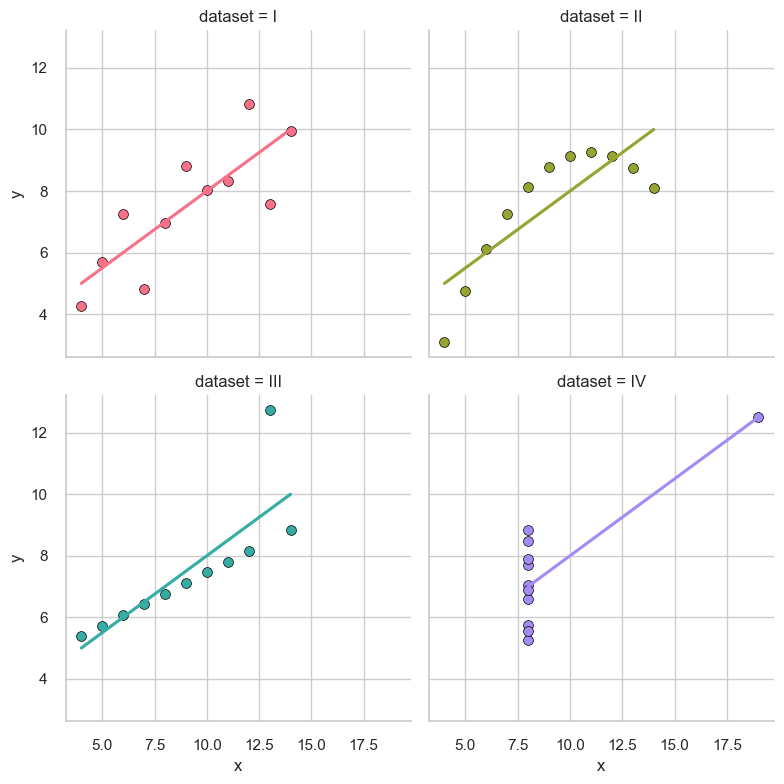

In [3]:
sns.set_theme(style="whitegrid")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="husl", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1, "linewidths": 0.5, "edgecolor": 'black'}
)

#### Examples - Linear Regression

##### Example 1 - Linear Regression

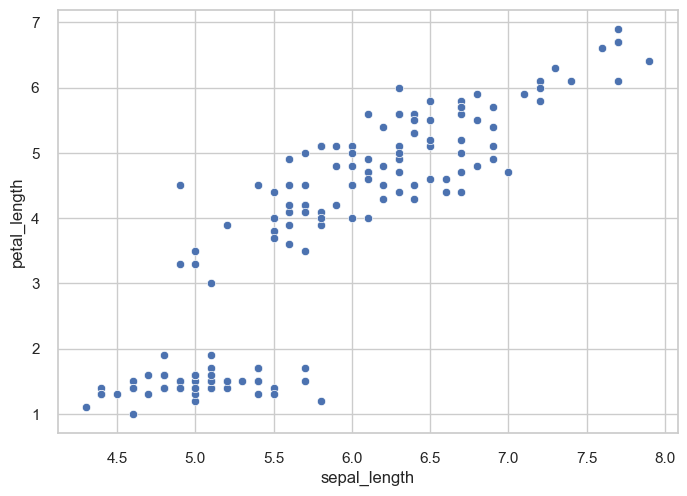

In [4]:
iris = sns.load_dataset('iris')
x = iris.sepal_length
y = iris.petal_length
_ = sns.scatterplot(x=x, y=y)

In [5]:
n = iris.sepal_width.size
xbar, ybar = x.mean(), y.mean()
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))
cov = sum(product)/n

In [6]:
beta1 = cov/np.var(x)
beta1

np.float64(1.8584329782548417)

With the slope $\beta_1$ estimated, we can now estimate the intercept $\beta_0$ using the formula:

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

Note: `sklearn` has the `.intercept_` and `.coef_` attributes to access the intercept and slope of the linear regression model.

In [7]:
beta0 = ybar - beta1*xbar
beta0

np.float64(-7.101443369602459)

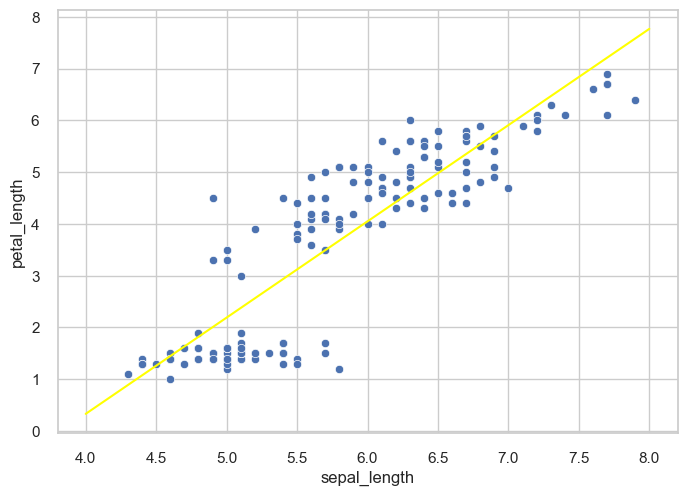

In [8]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='yellow')

In regression modeel terms, if we were provided with a sepal length $x_i$, we could use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the petal length of an iris flower, $\hat{y}_i$:

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$

Let's calculate the predicted petal length for a sepal length of 5.5 cm.

In [9]:
x_i = 5.5

In [10]:
y_i = beta0 + beta1 * x_i
y_i

np.float64(3.1199380107991708)

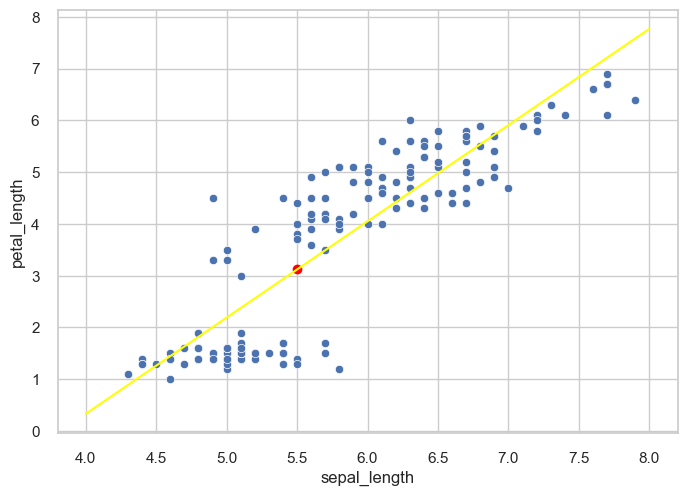

In [11]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='yellow')
_ = plt.scatter(x_i, y_i, marker='o', color='red')

##### Example 2 - Linear Regression

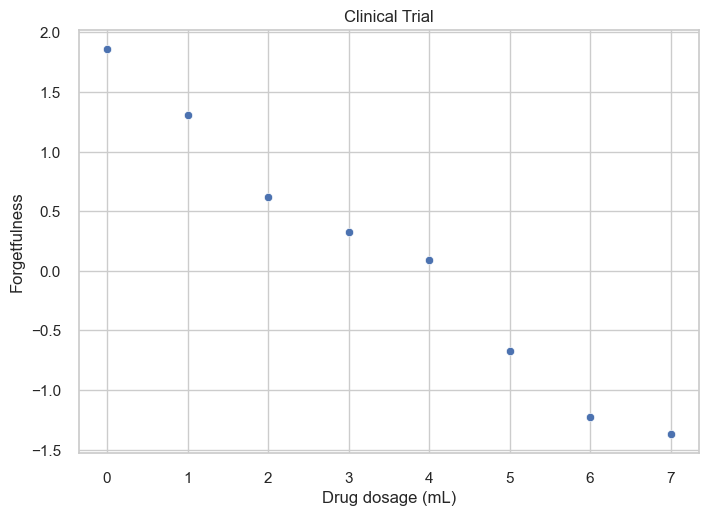

In [12]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [13]:
cov_mat = np.cov(x, y)
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta0 = y.mean() - beta1*x.mean()
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1*xline

Let's assume that the drug dosage is 4.5ml. We can use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the forgetfulness level of a patient.

In [14]:
x_i = 4.5
y_i = beta0 + beta1*x_i
y_i

np.float64(-0.35178571428571437)

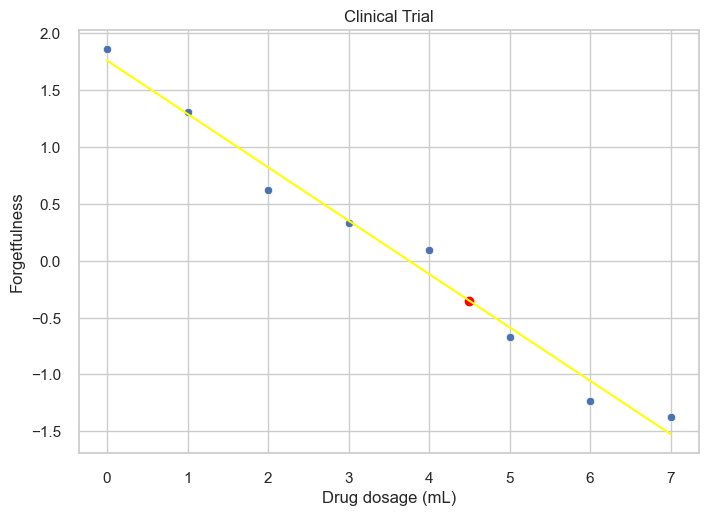

In [15]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='yellow')
_ = plt.scatter(x_i, y_i, marker='o', color='red')

#### Example 3 - Linear Regression

<Axes: >

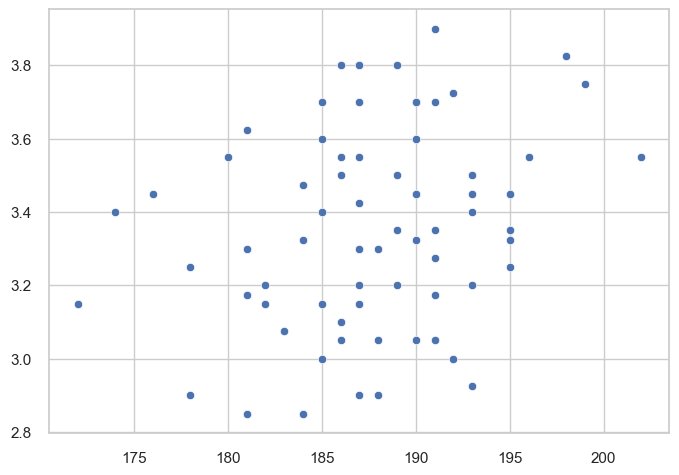

In [16]:
penguins = sns.load_dataset('penguins').dropna()
adelie = penguins[penguins.species == 'Adelie']
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
sns.scatterplot(x=x, y=y)

In [17]:
cov_mat = np.cov(x, y)
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta0 = y.mean() - beta1*x.mean()
cov_mat, beta1, beta0

(array([[31.304414  ,  0.3962852 ],
        [ 0.3962852 ,  0.07256564]]),
 np.float64(0.012659083726357767),
 np.float64(0.9915290574707036))

In [18]:
x_i = 197
y_i = beta0 + beta1*x_i
y_i

np.float64(3.485368551563184)

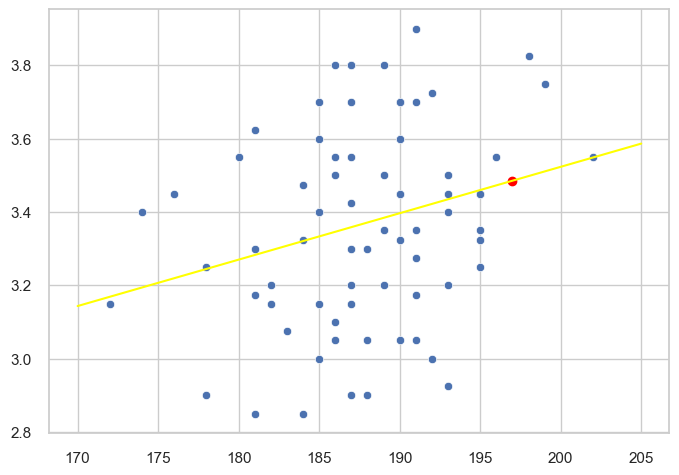

In [19]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='yellow')
_ = plt.scatter(x_i, y_i, marker='o', color='red')

#### Examples using sci-kit learn

##### Example 1 - Linear Regression with sci-kit learn

In [20]:
dataset = pd.read_csv('data/salary_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


It isn't necessarily more efficient to use `.iloc` to select the columns. It may be more efficient to use the column names directly.

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [22]:
# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

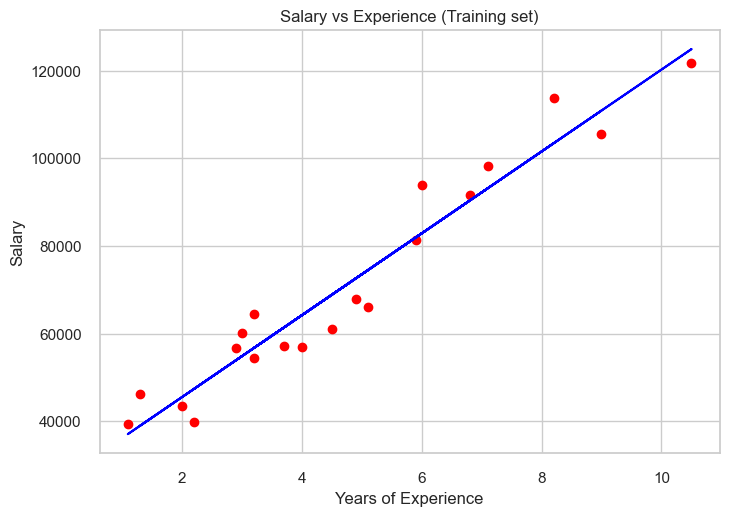

In [25]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

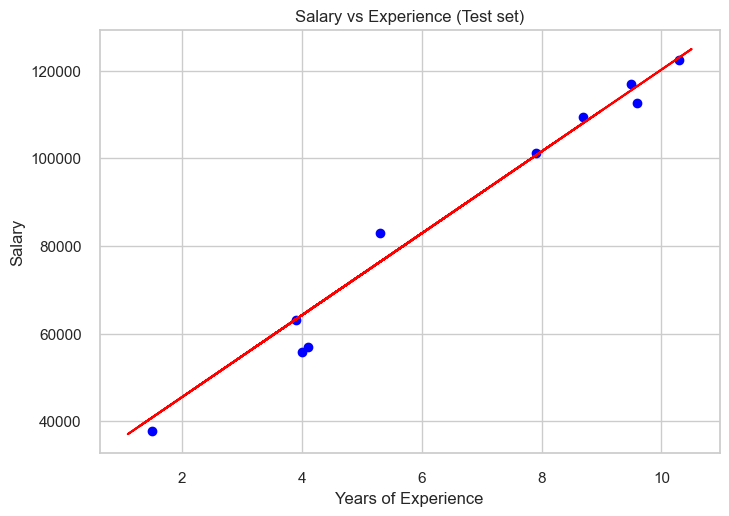

In [26]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()